# **CSE 3020 - DATA VISUALIZATION - J COMPONENT**

# **Visualizing and Predicting Success of Video Games Sales**

## **Importing necessary libraries**

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import calendar
from scipy.stats import zscore
from datetime import datetime
from pandas import Series
from pandas import get_dummies
from math import ceil
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn import svm

## **Reading the dataset**

In [66]:
df=pd.read_csv("Dataset.csv", encoding="utf-8")

In [67]:
dfa = df
dfa = dfa.copy()
df.head()

,Unnamed: 0,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,0,Wii Sports,Wii,2010.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.54,76.0,51.0,8.0,324.0,E
1,1,Super Mario Bros.,NES,1989.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN
2,2,Mario Kart Wii,Wii,2012.0,Racing,Nintendo,15.68,12.80,3.79,3.29,35.57,82.0,73.0,8.3,712.0,E
3,3,Wii Sports Resort,Wii,2013.0,Sports,Nintendo,15.61,10.95,3.28,2.95,32.78,80.0,73.0,8.0,193.0,E
4,4,Pokemon Red/Pokemon Blue,G,2000.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN


### **Distribution Plots to understand the data distribution**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


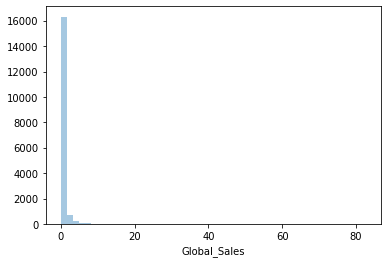

In [68]:
sns.distplot(df['Global_Sales'], kde=False)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


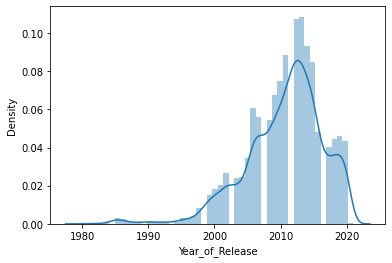

In [69]:
sns.distplot(df['Year_of_Release'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


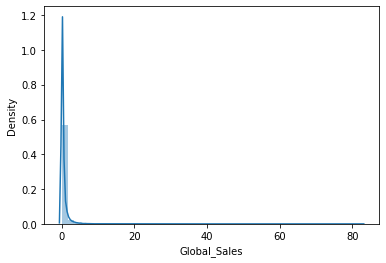

In [70]:
sns.distplot(df['Global_Sales'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


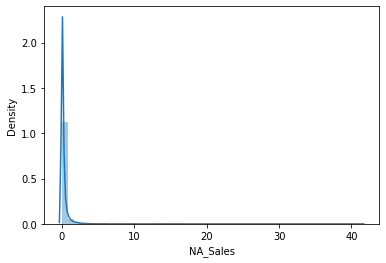

In [71]:
sns.distplot(df['NA_Sales'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


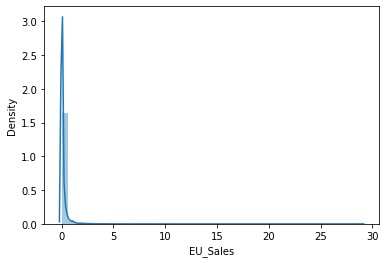

In [72]:
sns.distplot(df['EU_Sales'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


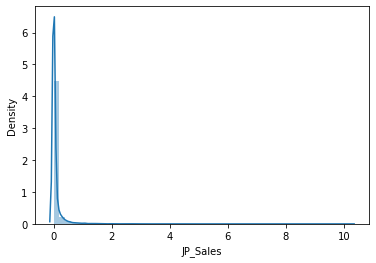

In [73]:
sns.distplot(df['JP_Sales'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


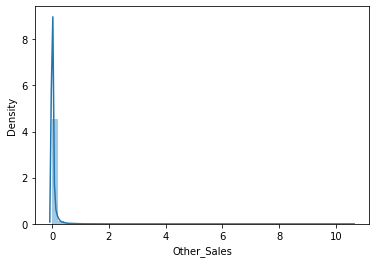

In [74]:
sns.distplot(df['Other_Sales'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


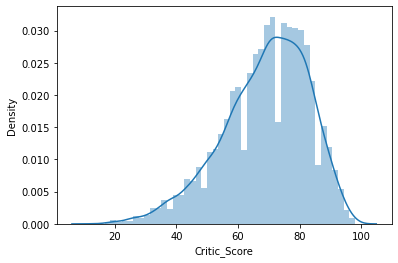

In [75]:
sns.distplot(df['Critic_Score'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


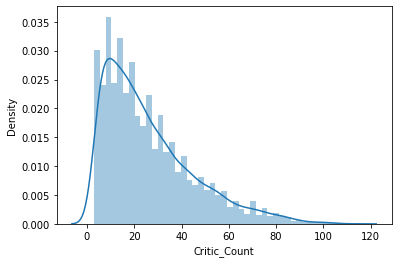

In [76]:
sns.distplot(df['Critic_Count'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


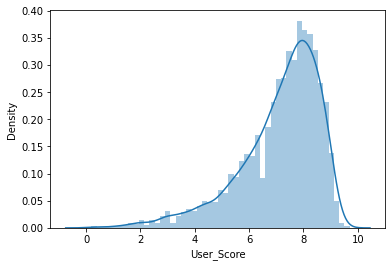

In [77]:
sns.distplot(df['User_Score'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


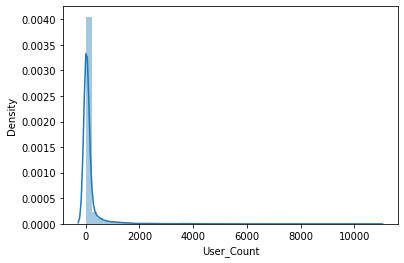

In [78]:
sns.distplot(df['User_Count'])

## **Pre-Processing the data**

**Checking for null values**

In [79]:
print(df.isnull().sum())

Unnamed: 0            0
Name                  0
Platform              0
Year_of_Release       8
Genre                 0
Publisher             1
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       9080
Critic_Count       9080
User_Score         9618
User_Count         9618
Rating             7164
dtype: int64


**Dropping null values from certain columns**

In [80]:
df1 = df.dropna(subset=['Name','Year_of_Release','Genre','Publisher'])
df1.isnull().sum()

Unnamed: 0            0
Name                  0
Platform              0
Year_of_Release       0
Genre                 0
Publisher             0
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       9073
Critic_Count       9073
User_Score         9610
User_Count         9610
Rating             7158
dtype: int64

**Changing data types**

In [81]:
df1['Year_of_Release'] = (df1['Year_of_Release']+4).astype('int')
df1['Year_of_Release']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0        2014
1        1993
2        2016
3        2017
4        2004
         ... 
17411    2015
17412    2015
17413    2010
17414    2017
17415    2015
Name: Year_of_Release, Length: 17408, dtype: int64

In [82]:
df1["User_Score"] = df1["User_Score"].replace('tbd', np.nan)
df1["User_Score"] = df1["User_Score"].astype('float')
df1.dtypes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Unnamed: 0           int64
Name                object
Platform            object
Year_of_Release      int64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score         float64
User_Count         float64
Rating              object
dtype: object

**Filling null values**

In [83]:
for x in ["Critic_Score", "Critic_Count", "User_Score", "User_Count", "Rating"]:
  if x != "Rating":
    df1.loc[df1[x].isnull(), x] = df1.groupby("Genre")[x].transform("mean")
  else:
    df1.loc[df1[x].isnull(), x] = df1.groupby("Genre")[x].fillna(df[x].mode()[0])

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


**Dataset after pre-processing**

In [84]:
df1.head()

,Unnamed: 0,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,0,Wii Sports,Wii,2014,Sports,Nintendo,41.36,28.96,3.77,8.45,82.54,76.000000,51.000000,8.000000,324.000000,E
1,1,Super Mario Bros.,NES,1993,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,68.091816,23.704591,7.276322,111.029885,E
2,2,Mario Kart Wii,Wii,2016,Racing,Nintendo,15.68,12.80,3.79,3.29,35.57,82.000000,73.000000,8.300000,712.000000,E
3,3,Wii Sports Resort,Wii,2017,Sports,Nintendo,15.61,10.95,3.28,2.95,32.78,80.000000,73.000000,8.000000,193.000000,E
4,4,Pokemon Red/Pokemon Blue,G,2004,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,72.571805,32.220026,7.602872,319.498695,E


In [85]:
df1.isnull().sum()

Unnamed: 0         0
Name               0
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
Critic_Score       0
Critic_Count       0
User_Score         0
User_Count         0
Rating             0
dtype: int64

## **Visualizing the data**

### **Time Series Analysis**

In [86]:
def plot_category_scores(df,category,y='Critic_Score',start_year=2000):

    x = dict(Counter(df[category]))

    x = {k:v for k, v in sorted(x.items(), key=lambda item:item[1], reverse=True)} 
    top_x = {k: x[k] for k in list(x)[:5]}

    a = list(top_x.keys())

    grouped = df.groupby(['Year_of_Release',category])[y].mean()

    column_name = '%s_%s'%(category,y)
    g = pd.DataFrame(grouped.reset_index(name=column_name))
    g = g[g[category].isin(a)]
    
    years = g['Year_of_Release']>= start_year
    g_after_start_year = g[years]
    
    # plot the data
    ax = sns.catplot(x='Year_of_Release', y=column_name, hue=category, kind='point', data=g_after_start_year, height=5, aspect=3)
    ax.fig.suptitle('%s of Top 5 %s with most games'%(y,category))
    
    return

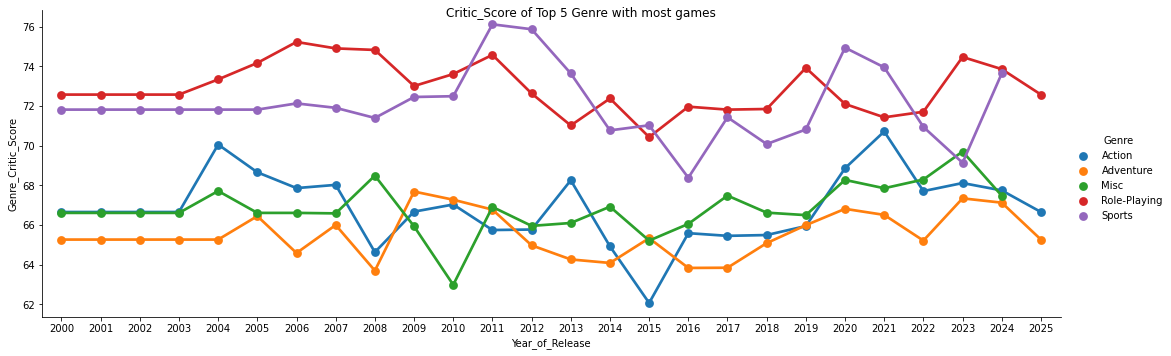

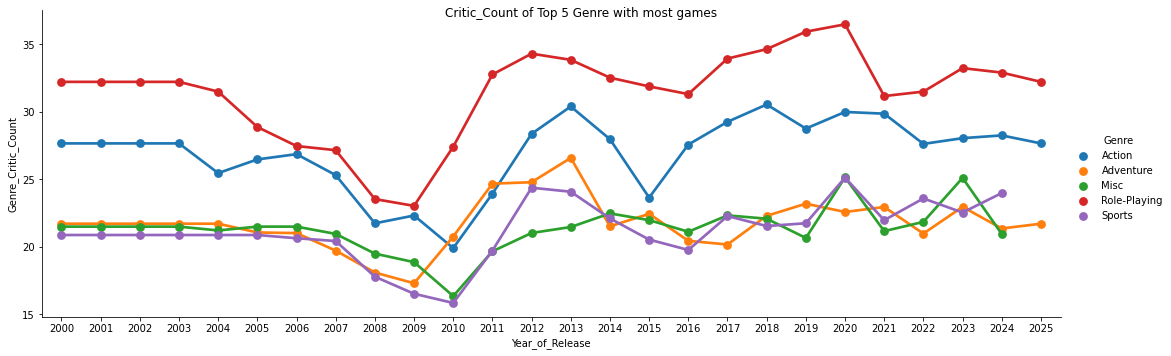

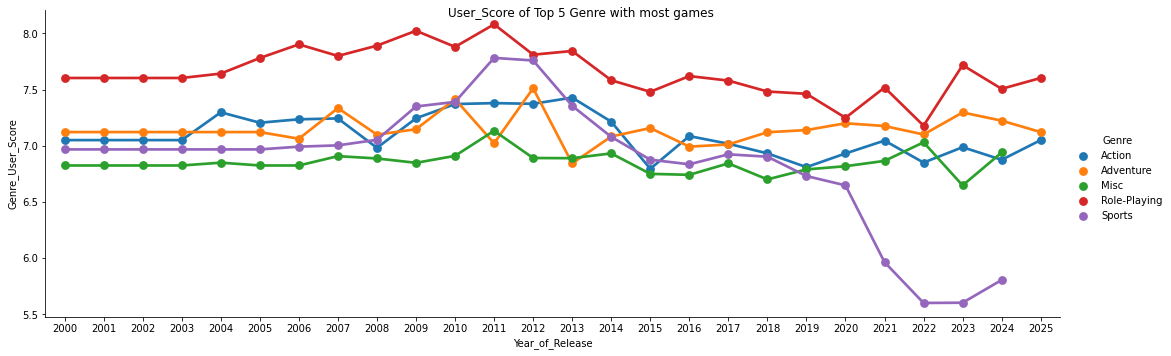

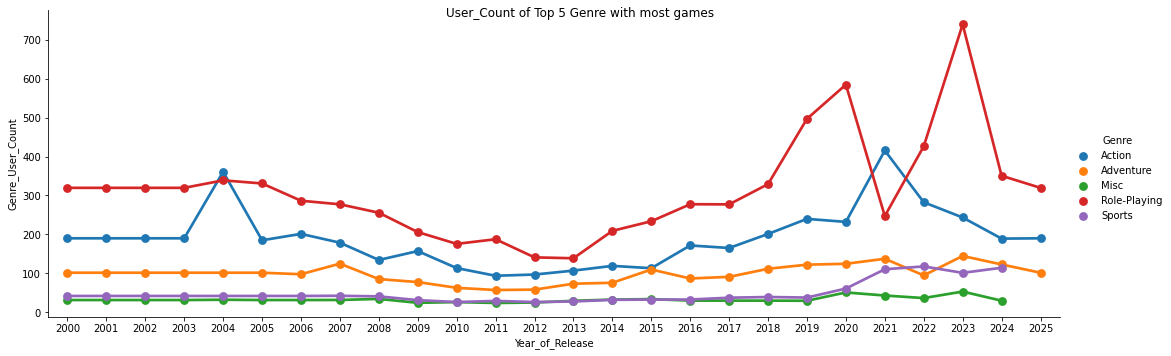

In [87]:
plot_category_scores(df1,'Genre',y='Critic_Score',start_year=2000)
plot_category_scores(df1,'Genre',y='Critic_Count',start_year=2000)
plot_category_scores(df1,'Genre',y='User_Score',start_year=2000)
plot_category_scores(df1,'Genre',y='User_Count',start_year=2000)

In [88]:
def plot_category_sales(df,category,region='Global',start_year=2000):
    x = dict(Counter(df[category]))

    x = {k:v for k, v in sorted(x.items(), key=lambda item:item[1], reverse=True)} 
    top_x = {k: x[k] for k in list(x)[:5]}

    a = list(top_x.keys())

    grouped = df.groupby(['Year_of_Release',category])['%s_Sales'%region].sum()
    column_name = '%s_%s_Sales'%(category,region)
    g = pd.DataFrame(grouped.reset_index(name=column_name))
    g = g[g[category].isin(a)]

    years = g['Year_of_Release']>= start_year
    g_after_start_year = g[years]
    
    ax = sns.catplot(x='Year_of_Release', y=column_name, hue=category, kind='point', data=g_after_start_year, height=5, aspect=3)
    ax.fig.suptitle('%s Sales of Top 5 %s with most games'%(region,category))    

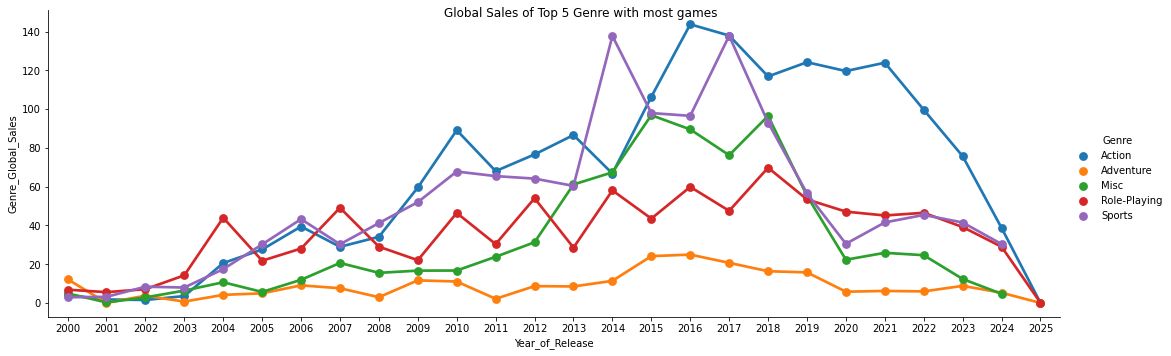

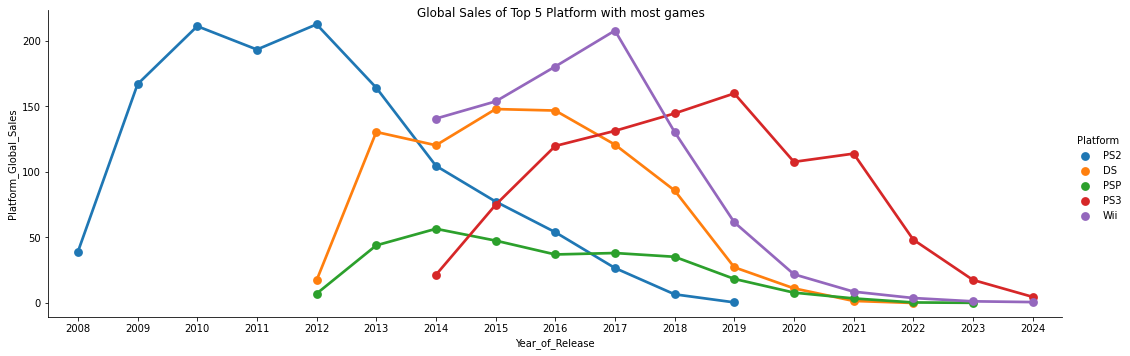

In [89]:
plot_category_sales(df1,'Genre',start_year=2000)
plot_category_sales(df1,'Platform',region='Global',start_year=2000)

In [90]:
def region_sales(df, region='Global'):

    if region=="Global":
        sales_per_year = df['Global_Sales'].groupby(df['Year_of_Release']).sum()
    elif region =="NA":
        sales_per_year = df['NA_Sales'].groupby(df['Year_of_Release']).sum()
    elif region =="EU":
        sales_per_year = df['EU_Sales'].groupby(df['Year_of_Release']).sum()
    elif region == "JP":
        sales_per_year = df['JP_Sales'].groupby(df['Year_of_Release']).sum()
    elif region == "Other":
        sales_per_year = df['Other_Sales'].groupby(df['Year_of_Release']).sum()
    
    return sales_per_year


def plot_region_sales(df,regions = ['Global','NA','EU','JP','Other']):

  fig = plt.figure(figsize=(15,7))
  fig.suptitle('Yearly Sales', fontsize=20)

  regions = ['Global','NA','EU','JP','Other']
  colors = ['r','c','g','b','m']
  for i in range(len(regions)):
      ax = fig.add_subplot(231+i)
      ax.set_title(regions[i])
      ax.plot(region_sales(df,region=regions[i]), color=colors[i])
  plt.show()
  return

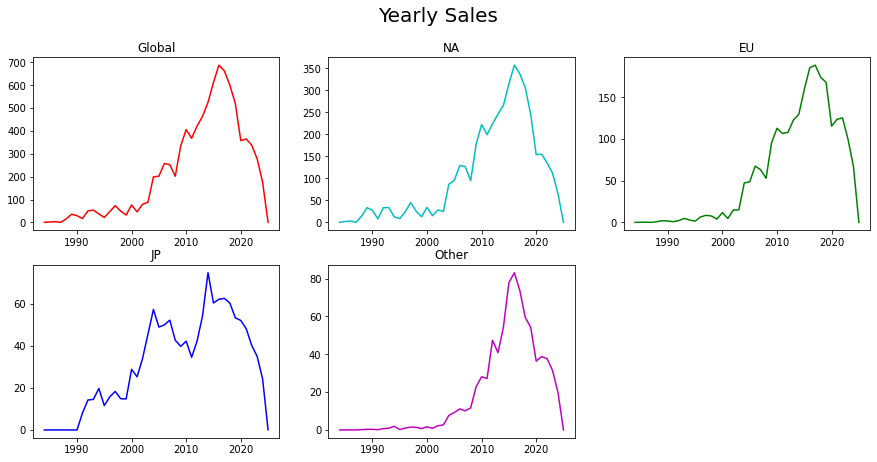

In [91]:
plot_region_sales(df1)

### **Histograms**

In [92]:
def hist_top_n(df, column, n=10, year=0):

    years = df['Year_of_Release'].unique()
    if year == 0:
        x = dict(df['Global_Sales'].groupby(df[column]).sum())
    elif year in years:
        x = dict(df['Global_Sales'].groupby(df[column]).sum().loc[df['Year_of_Release']==year])
    else:
        raise ValueError('The dataset does not contain data of that year.' )
        
    x = {k:v for k, v in sorted(x.items(), key=lambda item:item[1], reverse=True)} 

    top_x = {k: x[k] for k in list(x)[:n]}

    fig = plt.figure(figsize=(15,6))
    plt.bar(top_x.keys(), top_x.values(), width=0.65)
    plt.grid(axis='y', alpha=0.2)
    plt.xlabel(column)
    plt.ylabel('Global Sales')
    plt.xticks(rotation=45)
    
    earliest_year = int(df['Year_of_Release'].min())
    latest_year = int(df['Year_of_Release'].max()-1)
    if year==0:
        plt.title('Top %s %ss in Years %s-%s'%(n,column,earliest_year,latest_year))
    else:
        plt.title('Top %s %ss in Year %s '%(n,column,year))
    plt.show()
    
    return

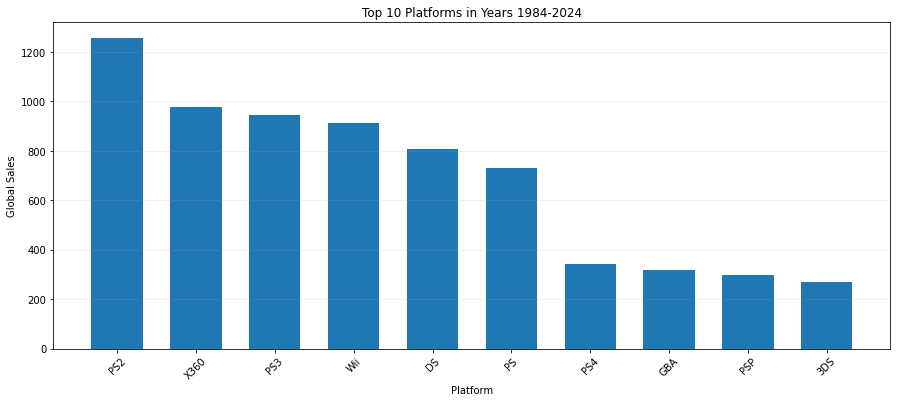

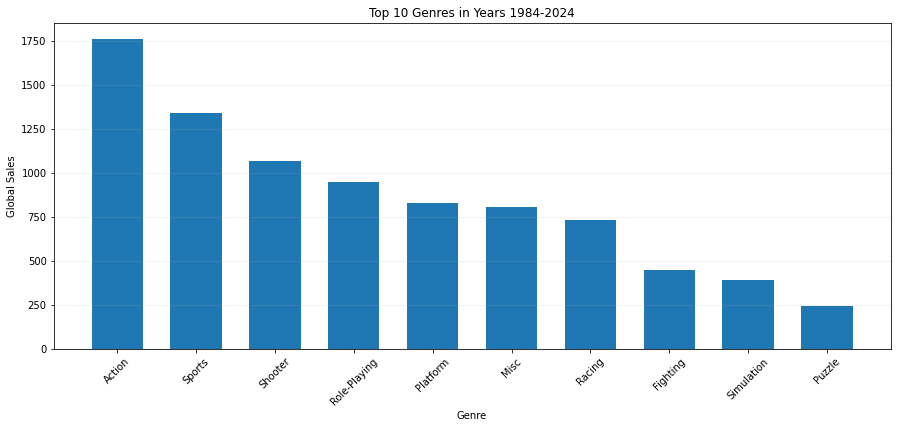

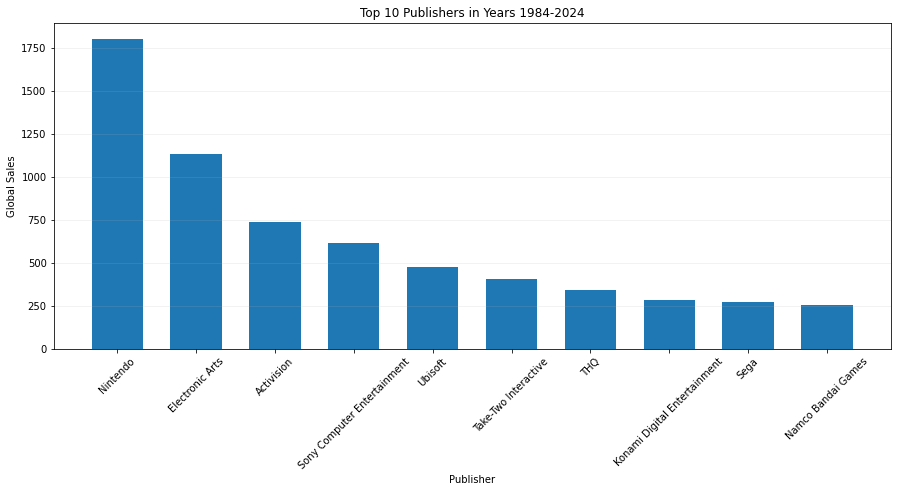

In [93]:
hist_top_n(df1, 'Platform', year=0)
hist_top_n(df1, 'Genre', n=10, year=0)
hist_top_n(df1,'Publisher',n=10, year=0)

### **Pie Charts**

In [94]:
def pie_chart_region_sales(df, year=0, regions=['NA','EU','JP','Other']):

    years = df['Year_of_Release'].unique()
    region_sales=[]
    for region in regions:
        if year == 0:
            sales = df['%s_Sales'%region].sum()
        elif year in df['Year_of_Release'].unique():
            sales = df['%s_Sales'%region].loc[df['Year_of_Release']==year].sum()
        else:
            raise ValueError('The dataset does not contain data of that year.')
            
        region_sales.append(sales)
    
    colors = ['orange','lime','skyblue','tomato']
    plt.pie(region_sales, labels=regions, colors=colors[0:len(regions)], autopct='%.2f')
    plt.axis('equal')
    
    if year == 0:
        plt.title('Regional Sales in Years 1980-2020')
    else:
        plt.title('Regional Sales in Year %s'%year)
    plt.show()
    
    return

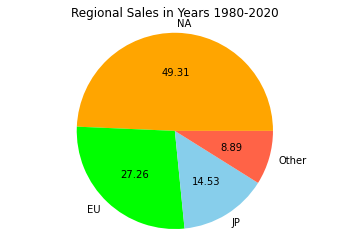

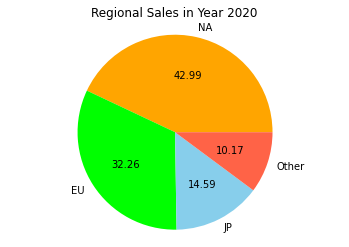

In [95]:
pie_chart_region_sales(df1, year=0, regions=['NA','EU','JP','Other']) 
pie_chart_region_sales(df1, year=2020, regions=['NA','EU','JP','Other']) 

### **Region-wise Sales Comparison using Scatter Plots**

In [96]:
def scatter_region_plot(df, x = 'NA_Sales', y = 'EU_Sales'):
  fig, ax = plt.subplots(figsize=(10, 5))
  plt.plot( x, y, "", data=df, linestyle='', marker='o',markersize=2)
  plt.title(x + ' vs ' + y)
  plt.xlabel(x)
  plt.ylabel(y)
  plt.xlim(0, 3)
  plt.ylim(0, 1.5)
  plt.show()

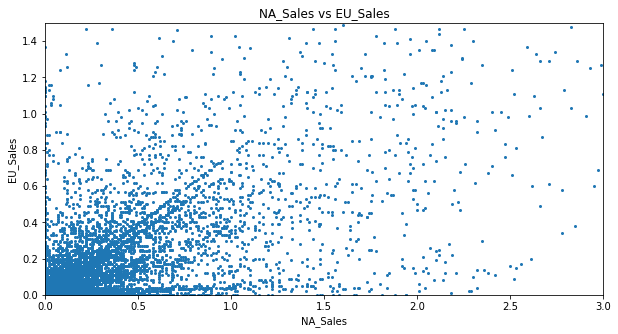

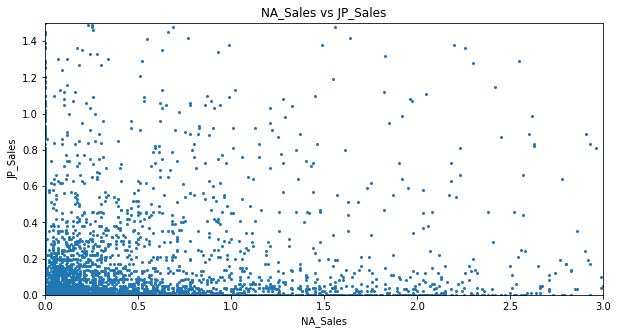

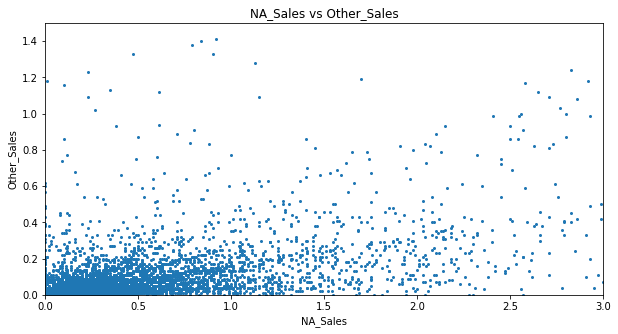

In [97]:
scatter_region_plot(df1, 'NA_Sales', 'EU_Sales')
scatter_region_plot(df1, 'NA_Sales', 'JP_Sales')
scatter_region_plot(df1, 'NA_Sales', 'Other_Sales')

## **Conversion of Attribute Types**

### **Converting quantitative data to categorical data**

In [98]:
def score_group(score):
    if score >= 90:
        return '90-100'
    elif score >= 80:
        return '80-89'
    elif score >= 70:
        return '70-79'
    elif score >= 60:
        return '60-69'
    elif score >= 50:
        return '50-59'
    else:
        return '0-49'

In [99]:
df1['Score_Group'] = df1['Critic_Score'].apply(lambda x: score_group(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### **Showing Co-Relation using Heat Maps**

In [100]:
def in_top(x):
    if x in pack:
        return x
    else:
        pass
def width(x):
    if x == 'Platform':
        return 10
    elif x == 'Developer':
        return 11
    elif x == 'Publisher':
        return 10.5
    elif x == 'Genre':
        return 11

def height(x):
    if x == 'Genre':
        return 5
    else:
        return 6

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


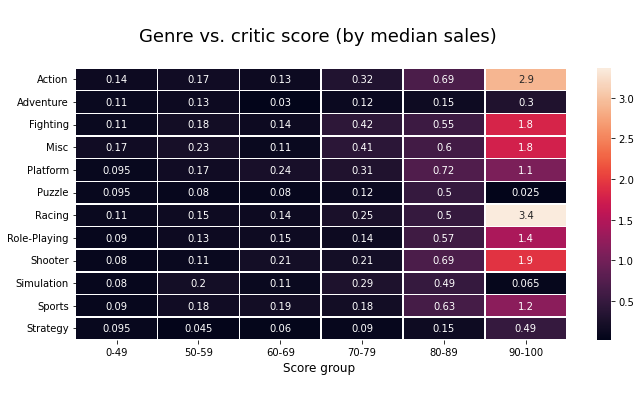

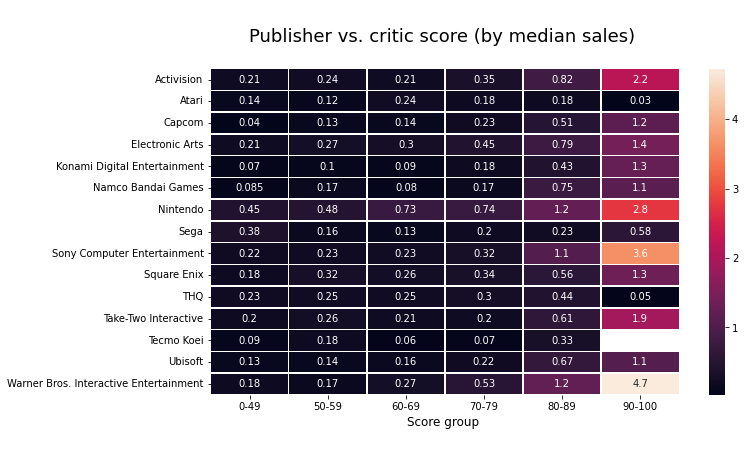

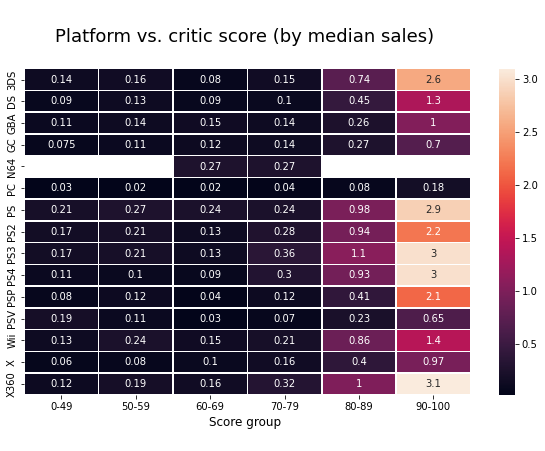

In [101]:
cols = ['Genre', 'Publisher', 'Platform']
for col in cols:
    pack = []
    top = df1[['Name', col]].groupby([col]).count().sort_values('Name', ascending=False).reset_index()[:15]
    for x in top[col]:
        pack.append(x)
    df1[col] = df1[col].apply(lambda x: in_top(x))
    df1_platform = df1[[col, 'Score_Group', 'Global_Sales']].groupby([col, 'Score_Group']).median().reset_index().pivot(col, "Score_Group", "Global_Sales")
    plt.figure(figsize=(width(col), height(col)))
    sns.heatmap(df1_platform, annot=True, fmt=".2g", linewidths=.5).set_title((' \n'+col+' vs. critic score (by median sales) \n'), fontsize=18)
    plt.ylabel('', fontsize=14)
    plt.xlabel('Score group \n', fontsize=12)
    pack = []

### **Converting categorical data to numerical data**

In [102]:
cols = ['Platform', 'Genre', 'Publisher', 'Rating']
for col in cols:
    uniques = df1[col].value_counts().keys()
    uniques_dict = {}
    ct = 0
    for i in uniques:
        uniques_dict[i] = ct
        ct += 1

    for k, v in uniques_dict.items():
        df1.loc[df1[col] == k, col] = v

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [103]:
df2 = df1[['Platform','Genre','Publisher','Year_of_Release','Critic_Score','Global_Sales']]
df2 = df2.dropna().reset_index(drop=True)
df2 = df2.astype('float64')

### **Showing Co-Relation using Heat Map**

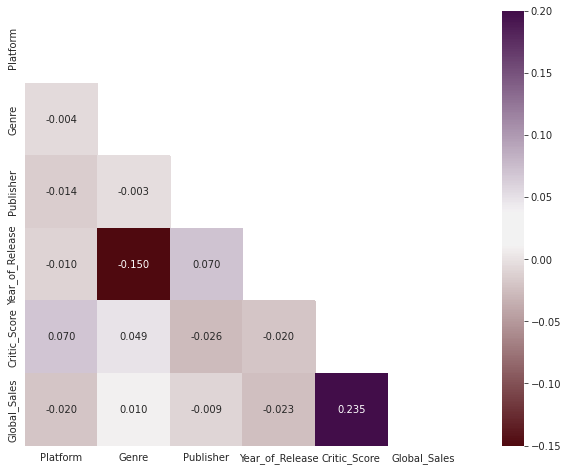

In [104]:
mask = np.zeros_like(df2.corr())
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(730, 300, sep=20, as_cmap=True, s=85, l=15, n=20) # note: 680, 350/470
with sns.axes_style("white"):
    fig, ax = plt.subplots(1,1, figsize=(15,8))
    ax = sns.heatmap(df2.corr(), mask=mask, vmax=0.2, square=True, annot=True, fmt=".3f", cmap=cmap)

## **Prediction Model**

### **Generating Hit Values**

In [105]:
dfb = dfa[['Name','Platform','Genre','Publisher','Year_of_Release','Critic_Score','Global_Sales']]
dfb = dfb.dropna().reset_index(drop=True)
df3 = dfb[['Platform','Genre','Publisher','Year_of_Release','Critic_Score','Global_Sales']]
df3['Hit'] = df3['Global_Sales']
df3.drop('Global_Sales', axis=1, inplace=True)

In [106]:
def hit(sales):
    if sales >= 1:
        return 1
    else:
        return 0

df3['Hit'] = df3['Hit'].apply(lambda x: hit(x))

### **Generating Features**

In [107]:
df3[:5]

,Platform,Genre,Publisher,Year_of_Release,Critic_Score,Hit
0,Wii,Sports,Nintendo,2010.0,76.0,1
1,Wii,Racing,Nintendo,2012.0,82.0,1
2,Wii,Sports,Nintendo,2013.0,80.0,1
3,DS,Platform,Nintendo,2010.0,89.0,1
4,Wii,Misc,Nintendo,2010.0,58.0,1


In [108]:
df_copy = pd.get_dummies(df3)

In [109]:
df_copy[:5]

,Year_of_Release,Critic_Score,Hit,Platform_3DS,Platform_DC,Platform_DS,Platform_GBA,Platform_GC,Platform_PC,Platform_PS,Platform_PS2,Platform_PS3,Platform_PS4,Platform_PSP,Platform_PSV,Platform_Wii,Platform_WiiU,Platform_X,Platform_X360,Platform_XOne,Genre_Action,Genre_Adventure,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy,Publisher_10TACLE Studios,Publisher_1C Company,Publisher_2D Boy,Publisher_3DO,Publisher_505 Games,Publisher_506 Games,Publisher_5p,Publisher_7Sixty LLC,...,Publisher_Tetris Online,Publisher_The Adventure Company,Publisher_Titus,Publisher_Tomy Corporation,Publisher_TopWare Interactive,Publisher_Touchstone,Publisher_Trion Worlds,Publisher_Tripwire Interactive,Publisher_Tru Blu Entertainment,Publisher_UFO Interactive,Publisher_Ubisoft,Publisher_Ubisoft Annecy,Publisher_Universal Interactive,Publisher_Unknown,Publisher_Valcon Games,Publisher_Valve,Publisher_Valve Software,Publisher_Vatical Entertainment,Publisher_Victor Interactive,Publisher_Vir2L Studios,Publisher_Virgin Interactive,Publisher_Visco,Publisher_Vivendi Games,Publisher_Wanadoo,Publisher_Wargaming.net,Publisher_Warner Bros. Interactive Entertainment,Publisher_White Park Bay Software,Publisher_XS Games,Publisher_Xicat Interactive,Publisher_Xplosiv,Publisher_Xseed Games,Publisher_Yacht Club Games,Publisher_YooStar Entertainment Group Inc.,Publisher_Yukes,Publisher_Zoo Digital Publishing,Publisher_Zoo Games,Publisher_Zushi Games,Publisher_bitComposer Games,Publisher_id Software,Publisher_inXile Entertainment
0,2010.0,76.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2012.0,82.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2013.0,80.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2010.0,89.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2010.0,58.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### **Splitting Test and Train data**

In [110]:
df4 = df_copy
y = df4['Hit'].values
df4 = df4.drop(['Hit'],axis=1)
X = df4.values

In [111]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.50, random_state=2)

### **Random Forest Classifier and Logistic Regression**

In [112]:
radm = RandomForestClassifier(random_state=2).fit(Xtrain, ytrain)
y_val_1 = radm.predict_proba(Xtest)
print("Validation accuracy: ", sum(pd.DataFrame(y_val_1).idxmax(axis=1).values
                                   == ytest)/len(ytest))

Validation accuracy:  0.8637236084452975


In [113]:
log_reg = LogisticRegression().fit(Xtrain, ytrain)
y_val_2 = log_reg.predict_proba(Xtest)
print("Validation accuracy: ", sum(pd.DataFrame(y_val_2).idxmax(axis=1).values
                                   == ytest)/len(ytest))

Validation accuracy:  0.8670825335892515


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


**Classification Report**

In [114]:
all_predictions1 = radm.predict(Xtest)
print(classification_report(ytest, all_predictions1))

all_predictions2 = log_reg.predict(Xtest)
print(classification_report(ytest, all_predictions2))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      3465
           1       0.65      0.41      0.51       703

    accuracy                           0.86      4168
   macro avg       0.77      0.68      0.71      4168
weighted avg       0.85      0.86      0.85      4168

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      3465
           1       0.70      0.37      0.49       703

    accuracy                           0.87      4168
   macro avg       0.79      0.67      0.70      4168
weighted avg       0.85      0.87      0.85      4168



Text(0.5, 1.0, 'Training Set Confusion Matrix - Logistic Regression')

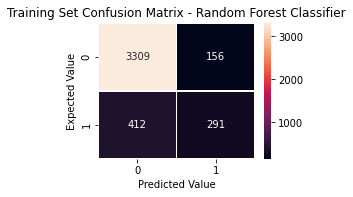

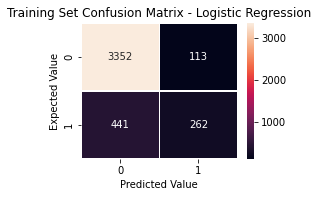

In [115]:
fig, ax = plt.subplots(figsize=(3.5,2.5))
sns.heatmap(confusion_matrix(ytest, all_predictions1), annot=True, linewidths=.5, ax=ax, fmt="d").set(xlabel='Predicted Value', ylabel='Expected Value')
plt.title('Training Set Confusion Matrix - Random Forest Classifier')

fig, ax = plt.subplots(figsize=(3.5,2.5))
sns.heatmap(confusion_matrix(ytest, all_predictions2), annot=True, linewidths=.5, ax=ax, fmt="d").set(xlabel='Predicted Value', ylabel='Expected Value')
plt.title('Training Set Confusion Matrix - Logistic Regression')

### **Ranking Feature Performance**

**Feature Importance for Random Forest Classifier**

In [116]:
indices = np.argsort(radm.feature_importances_)[::-1]

print('Feature ranking (top 10):')

for f in range(10):

    print('%d. Feature %d - %s (%f)' % (f+1 , indices[f], df4.columns[indices[f]],
                                      radm.feature_importances_[indices[f]]))

Feature ranking (top 10):
1. Feature 1 - Critic_Score (0.332180)
2. Feature 0 - Year_of_Release (0.162744)
3. Feature 233 - Publisher_Nintendo (0.031583)
4. Feature 19 - Genre_Action (0.021141)
5. Feature 102 - Publisher_Electronic Arts (0.019904)
6. Feature 27 - Genre_Shooter (0.017708)
7. Feature 29 - Genre_Sports (0.016600)
8. Feature 7 - Platform_PC (0.016197)
9. Feature 10 - Platform_PS3 (0.016158)
10. Feature 9 - Platform_PS2 (0.014521)


Text(0, 0.5, 'Feature Importance')

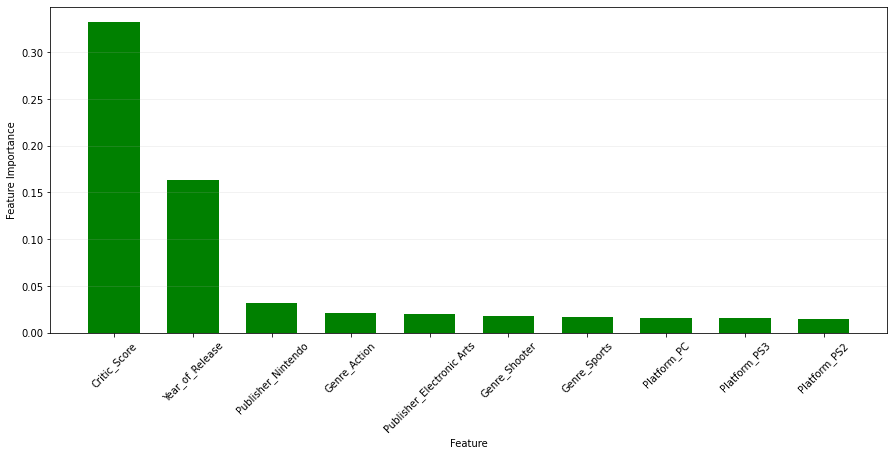

In [117]:
features_dict = {"Feature": df4.columns[indices[:10]], "Feature Importance": radm.feature_importances_[indices[:10]]}
fd = pd.DataFrame.from_dict(features_dict)

fig = plt.figure(figsize=(15,6))
plt.bar(fd['Feature'], fd['Feature Importance'], width=0.65, color = 'green')
plt.grid(axis='y', alpha=0.2)
plt.xlabel("Feature")
plt.xticks(rotation = 45)
plt.ylabel('Feature Importance')

**Feature Importance for Logistic Regression**

In [118]:
indices = np.argsort(log_reg.coef_[0])[::-1]

print('Feature ranking (top 10):')

for f in range(10):

    print('%d. Feature %d - %s (%f)' % (f+1 , indices[f], df4.columns[indices[f]],
                                      log_reg.coef_[0][indices[f]]))

Feature ranking (top 10):
1. Feature 233 - Publisher_Nintendo (2.315814)
2. Feature 209 - Publisher_Microsoft Game Studios (1.236174)
3. Feature 192 - Publisher_LucasArts (1.207092)
4. Feature 14 - Platform_Wii (1.154155)
5. Feature 102 - Publisher_Electronic Arts (1.100085)
6. Feature 8 - Platform_PS (1.053785)
7. Feature 11 - Platform_PS4 (1.004174)
8. Feature 10 - Platform_PS3 (0.953759)
9. Feature 343 - Publisher_Warner Bros. Interactive Entertainment (0.936078)
10. Feature 58 - Publisher_Atari (0.863102)


Text(0, 0.5, 'Feature Importance')

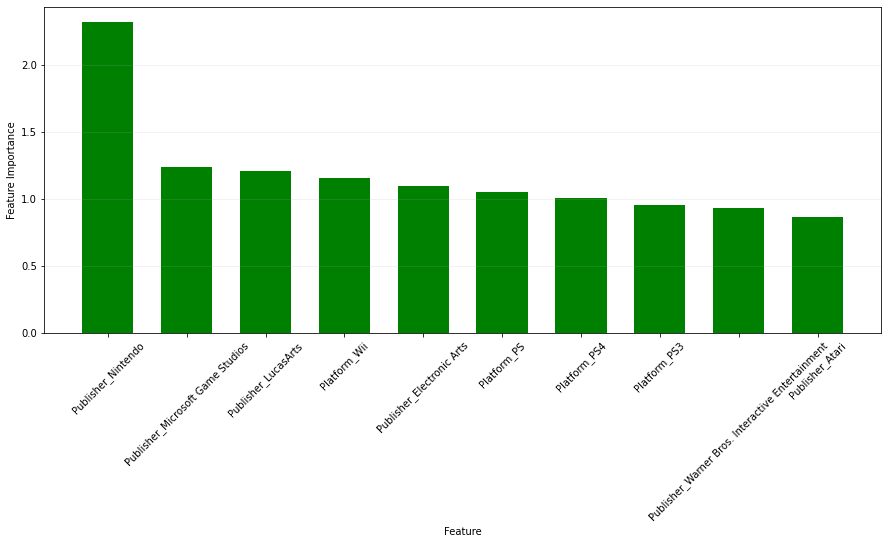

In [119]:
features_dict_logreg = {"Feature": df4.columns[indices[:10]], "Feature Importance": log_reg.coef_[0][indices[:10]]}
fd2 = pd.DataFrame.from_dict(features_dict_logreg)

fig = plt.figure(figsize=(15,6))
plt.bar(fd2['Feature'], fd2['Feature Importance'], width=0.65, color = 'green')
plt.grid(axis='y', alpha=0.2)
plt.xlabel("Feature")
plt.xticks(rotation = 45)
plt.ylabel('Feature Importance')

## **Predicting Hit Probabilities of 2020 games**



In [120]:
not_hit_copy = df_copy[df_copy['Hit'] == 0]

In [121]:
df5 = not_hit_copy
y = df5['Hit'].values
df5 = df5.drop(['Hit'],axis=1)
X = df5.values

In [122]:
pred = radm.predict_proba(X)

In [123]:
dfb = dfb[dfb['Global_Sales'] < 1]

In [124]:
dfb['Hit_Probability'] = pred[:,1]

In [125]:
dfb = dfb[dfb['Year_of_Release'] == 2020]
dfb.sort_values(['Hit_Probability'], ascending=[False], inplace=True)
df6 = dfb[['Name', 'Platform', 'Publisher', 'Genre', 'Hit_Probability']]

In [126]:
df6[:10].reset_index(drop=True)

,Name,Platform,Publisher,Genre,Hit_Probability
0,World of Warcraft: Legion,PC,Activision,Role-Playing,0.650000
1,Mario Party: Star Rush,3DS,Nintendo,Misc,0.577500
2,Star Fox: Zero,WiiU,Nintendo,Shooter,0.540000
3,Fast Racing Neo,WiiU,Nintendo,Action,0.510000
4,Titanfall 2,XOne,Electronic Arts,Shooter,0.496167
5,Dark Souls III,XOne,Namco Bandai Games,Role-Playing,0.491667
6,WWE 2K17,PS4,Take-Two Interactive,Sports,0.490000
7,Lego Star Wars: The Force Awakens,XOne,Warner Bros. Interactive Entertainment,Action,0.470000
8,Batman: Return to Arkham,XOne,Warner Bros. Interactive Entertainment,Action,0.470000
9,Plants vs. Zombies: Garden Warfare 2,PS4,Electronic Arts,Shooter,0.460000


In [127]:
def predict(year,critic,plat,gen,pub):
  a = np.zeros(shape=(1,359),dtype=int)
  df_new = pd.DataFrame(a,columns=df_copy.columns)
  df_new["Year_of_Release"][0]=year
  df_new["Critic_Score"][0]=critic
  df_new["Platform_"+plat]=1
  df_new["Genre_"+gen]=1
  df_new["Publisher_"+pub]=1
  df_new = df_new.drop(['Hit'],axis=1)
  X = df_new.values
  pred = radm.predict_proba(X)
  return pred[:1,1][0]

In [128]:
prob = predict(2025,96,"3DS","Action","Nintendo")
print ("Probability of game being a hit is ",'%.2f'%(prob*100),"%")

Probability of game being a hit is  78.00 %


## **Plotting Results**

### **Platform-wise Games with highest hit probabilities**

In [129]:
def plot_hits(plat):
  x = df6[df6['Platform']==plat]

  fig = plt.figure(figsize=(15,6))
  plt.barh(x['Name'][:10], x['Hit_Probability'][:10], height=0.65, color = 'skyblue')
  plt.style.use('ggplot')
  plt.title("Hit Probabilities of top 10 " + plat + " games")
  plt.grid(axis='y', alpha=0.2)
  plt.xlabel('Name')
  plt.ylabel('Hit Probability')

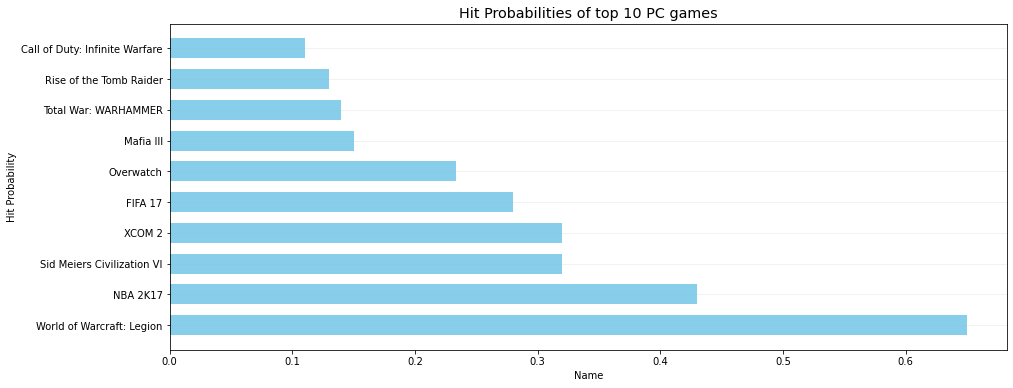

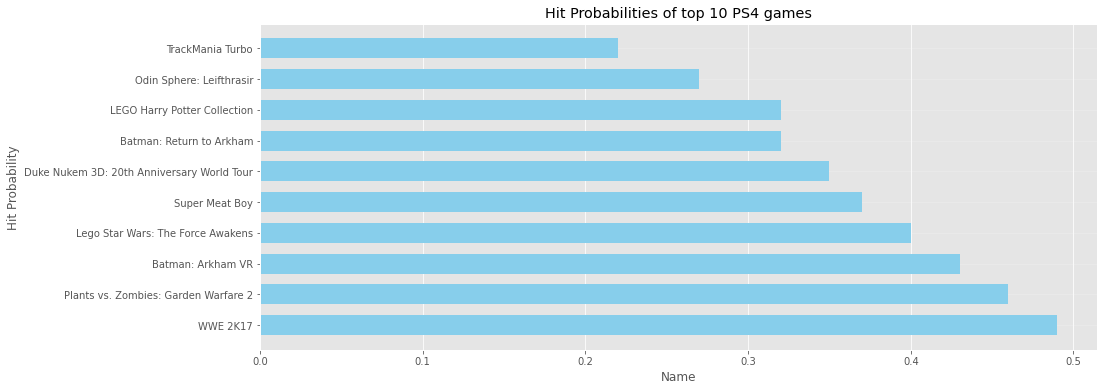

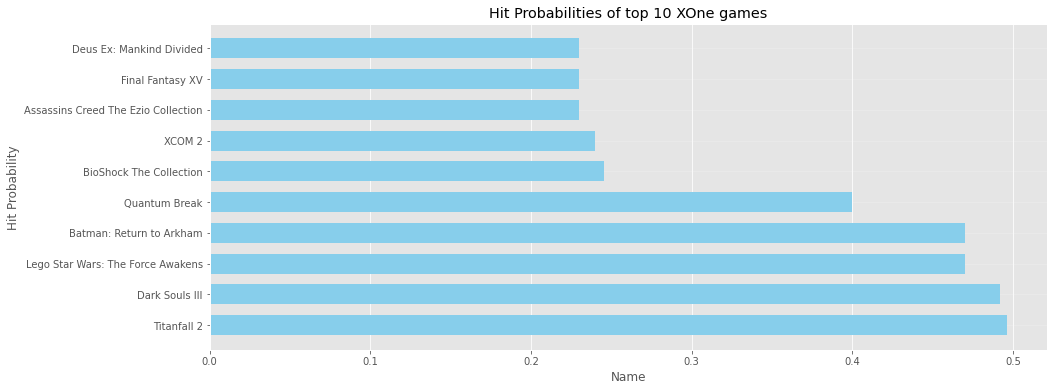

In [130]:
plot_hits("PC")
plot_hits("PS4")
plot_hits("XOne")

### **Best Performing Genres/Publishers/Platforms**

In [131]:
def plot_counts(column, n = 10):
  x = dict(Counter(df6[column]))

  x = {k:v for k, v in sorted(x.items(), key=lambda item:item[1], reverse=True)} 
  top_x = {k: x[k] for k in list(x)[:n]}

  fig = plt.figure(figsize=(15,6))
  plt.bar(top_x.keys(), top_x.values(), width=0.65, color = 'grey', edgecolor='blue')
  plt.grid(axis='y', alpha=0.2)
  plt.xlabel(column)
  plt.xticks(rotation = 45)
  plt.ylabel('Counts of Video Game')

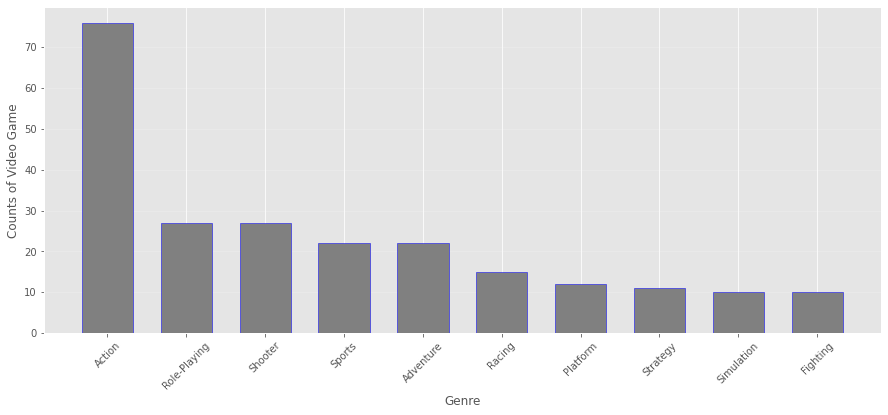

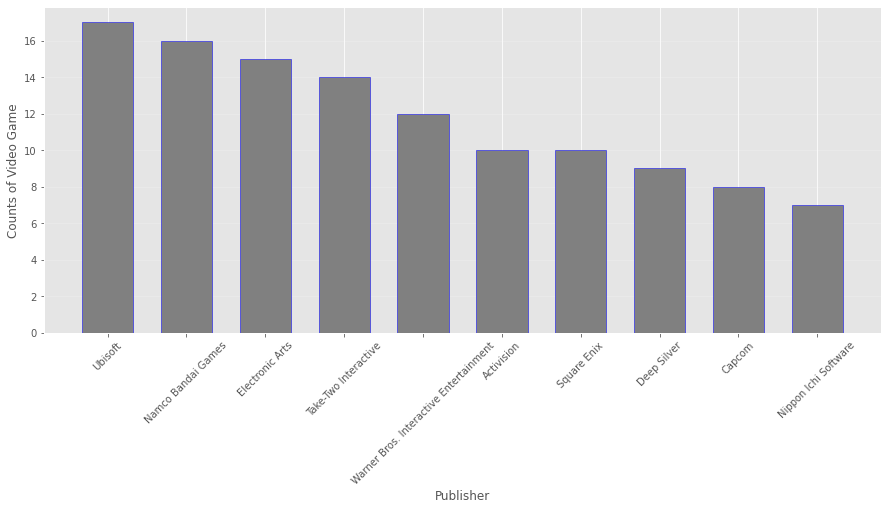

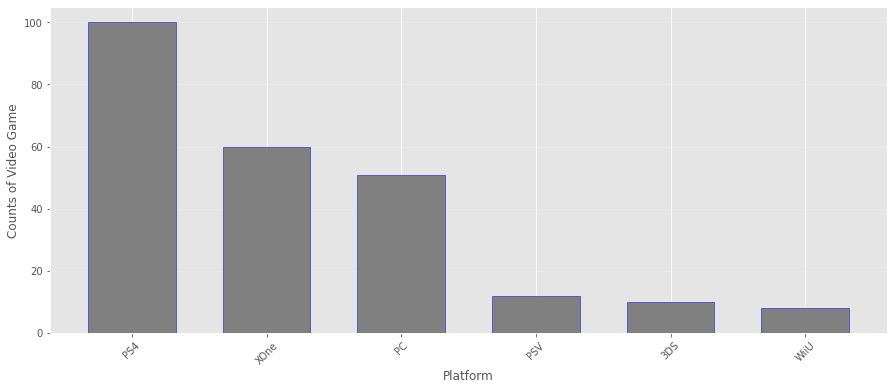

In [132]:
plot_counts("Genre")
plot_counts("Publisher")
plot_counts("Platform")